# Generalized KNN Classifier Demonstration on the MNIST Dataset
**Harold Ainsworth**, January 2020 

The MNIST database is a large set of handwritten digits that is commonly used for training image processing systems. In this demonstration, we are using the dataset to train the generalized K Nearest Neighbors classifier and show that it can correctly predict the classification labels of test digits.

In [1]:
# import libraries for ease of use
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pylab as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import confusion_matrix
%matplotlib inline
# import classifier from file
from KNN import KNN

In [2]:
# import digit data from sklearn
class MNIST_import:
    def __init__(self, label_arr):
        X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
        
        # Convert the labels to numeric labels
        labels = label_arr
        for idx, l in enumerate(labels):
            y[y == l] = idx
            
        y = y.astype(np.int32)        
        self.train_x, self.train_y = X[:5000,:], y[:5000]
        self.val_x, self.val_y = X[5000:6000,:], y[5000:6000]
        


label_arr = ['0','1','2','3','4','5','6','7','8','9']
data = MNIST_import(label_arr)

Each digit image is an array of 784 pixels (28x28 pixel image). The following `view_digit` function prints the digit array as an image for any given digit so that we can visually verify what our classifier is doing. `view_digits` prints out the same information but takes a list of digits rather than a single digit.

In [3]:
def view_digit(x, label=None, prediction=None):
    fig = plt.figure(figsize=(3,3))
    # reshape x as 28x28 array and show image
    plt.imshow(x.reshape(28,28), cmap='gray');
    plt.xticks([]); plt.yticks([]);
    img_label = ''
    if label != None : img_label += 'true classification: {}'.format(label)
    if prediction != None: img_label += '\nprediction: {}'.format(prediction)
    plt.xlabel(img_label, fontsize=16)

In [4]:
def view_digits(X, labels=[], predictions=[]):
    fig, ax = plt.subplots(ncols=len(X), nrows=1, figsize=(len(X)*3,3))
    # reshape x as 28x28 array and show image
    for i in range(len(X)):
        ax[i].imshow(X[i].reshape(28,28), cmap='gray');
        ax[i].set_xticks([]); ax[i].set_yticks([]);
        img_label = ''
        if labels != []: img_label += 'true classification: {}'.format(labels[i])
        if predictions != []: img_label += '\nprediction: {}'.format(predictions[i])
        ax[i].set_xlabel(img_label, fontsize=16)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  


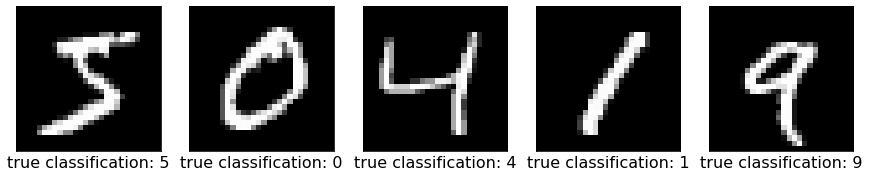

In [5]:
# view the first 5 digits in the training data set 
view_digits(data.train_x[0:5], data.train_y[0:5])

As you can see above, the first 5 digits in the training set are 5, 0, 4, 1, and 9. In the cell below, we are going to use the entire set of training data to train the `KNN` instance `knn`. Then we will predict the classification labels for each digit in the test data, stored in `yhat`. 

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  


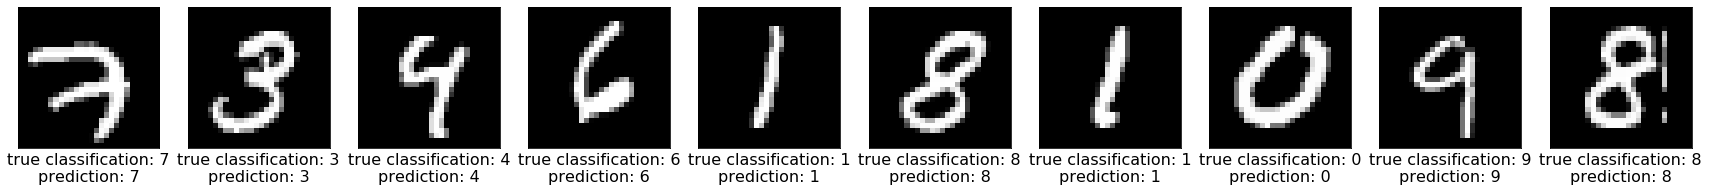

In [6]:
# init KNN classifier with training data using 5 nearest neighbors to classify new points 
knn = KNN(data.train_x, data.train_y, 5)
knn.classify(data.val_x[0])
# predict for all test data 
yhat = knn.predict(data.val_x)

# view the first 10 testing digits with true labels and predicted labels
view_digits(data.val_x[0:10], data.val_y[0:10], yhat[0:10])

Given that the predictions are all correct for these first 10 digits, it looks like our classifier is working pretty well. However, we want to verify the accuracy of the classifier for the entire dataset. The cell below verifies that our prediction accuracy on the test data with $K=5$ is $94.1\%$.

In [7]:
print(knn.test_accuracy(data.val_x, data.val_y))

0.941


Since our hyperparamater $K$ is variable, we want to find the value $K=k$ such that our prediction accuracy is the greatest. The below code calculates the accuracy of classifiers with $K = 1, 2, \ldots, 20$. The resulting plot shows that the classifier that uses the $3$ nearest neighbors ($K=3$) is the most accurate classifier.  

In [8]:
accuracies = []
ks = range(1,21)
for k in ks:
    # init classifier for each k
    knn = KNN(data.train_x, data.train_y, k)
    # test accuracy for each classifier with test data 
    accuracies.append(knn.test_accuracy(data.val_x, data.val_y))
    

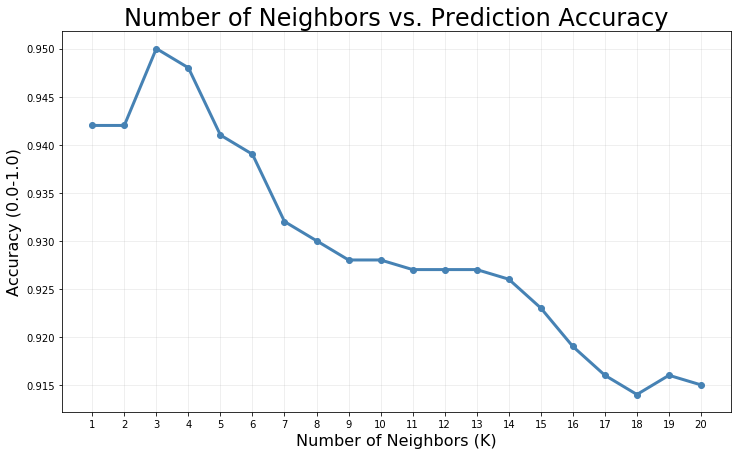

In [9]:
# plot ks vs accuracies at each k 
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,7))
ax.plot(ks, accuracies, marker="o", color="steelblue", lw=3)
ax.set_title("Number of Neighbors vs. Prediction Accuracy", fontsize=24)
ax.set_xlabel("Number of Neighbors (K)", fontsize=16)
ax.set_ylabel("Accuracy (0.0-1.0)", fontsize=16)
plt.xticks(range(1,21))
ax.grid(alpha=0.25)

Now that we know that our classifier with $K=3$ is predicting test digits with an accuracy of $95.0\%$, it might be important to check why $5.0\%$ of the test digits are being predicted incorrectly. The below code creates a confusion matrix to break down what digits are being frequently classified as other digits. Given the below matrix, it seems that 4s and 7s are sometimes incorrectly classified as 9s, which makes sense because 4s, 7s, and 9s, share the same general shape, and if written poorly could easily be classified incorrectly. 

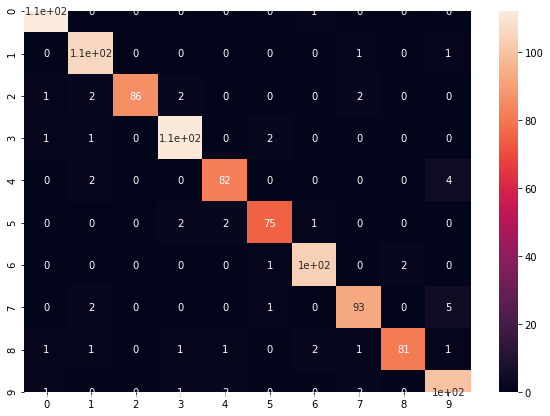

In [10]:
# init classifier and predict for test data 
knn = KNN(data.train_x, data.train_y, K=3)
val_yhat = knn.predict(data.val_x)
# get confusion matrix
matrix = confusion_matrix(data.val_y, val_yhat, labels=[0,1,2,3,4,5,6,7,8,9])
# plot confusion matrix 
df_matrix = pd.DataFrame(matrix, index=[0,1,2,3,4,5,6,7,8,9], columns=[0,1,2,3,4,5,6,7,8,9])
plt.figure(figsize = (10,7))
sn.heatmap(df_matrix, annot=True)